# Classification Assignment1 2020AIML003

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

# Read input data and performance exploratory data analysis

In [2]:
dataset = pd.read_csv("Cancer_Dataset.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BloodPressure   768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.nunique()

Pregnancies        17
Glucose           136
BloodPressure      47
SkinThickness      51
Insulin           186
BMI               248
Cancer_Markers    517
Age                52
Outcome             2
dtype: int64

# We see that there are 500+ instances where Outcome is '0' and 200+ 
# instances where Outcome is '1'... So, there seems to be no bad imbalance in 
# the data given...
#
# In the input data provided, there are instances, where glucose, BP, BMI & 
# skin thickness are 0. This cannot be true and hence these instances
# have to be dropped, so that we deal with meaningful data/instances only...
# 

In [9]:
index_names = dataset[ (dataset['Glucose'] == 0) | (dataset['BloodPressure'] == 0) | (dataset['SkinThickness'] == 0) | (dataset['BMI'] == 0)].index
dataset.drop(index_names, inplace = True)

In [10]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1


In [11]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
dataset.shape

(532, 9)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     532 non-null    int64  
 1   Glucose         532 non-null    int64  
 2   BloodPressure   532 non-null    int64  
 3   SkinThickness   532 non-null    int64  
 4   Insulin         532 non-null    int64  
 5   BMI             532 non-null    float64
 6   Cancer_Markers  532 non-null    float64
 7   Age             532 non-null    int64  
 8   Outcome         532 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 41.6 KB


In [14]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
dataset.nunique()

Pregnancies        17
Glucose           126
BloodPressure      42
SkinThickness      50
Insulin           185
BMI               222
Cancer_Markers    413
Age                46
Outcome             2
dtype: int64

# Now that data has been cleaned up, let's perform some data visualisation 
# to understand relationship between input and output variables, corrleation 
# between input variables etc

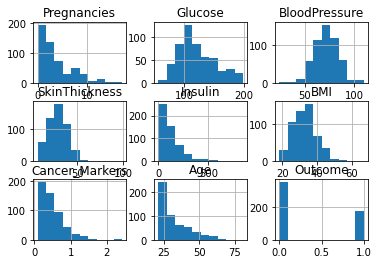

In [16]:
# now lets see the histogram plot to see the nature of data/spread
dataset.hist()
plt.show()

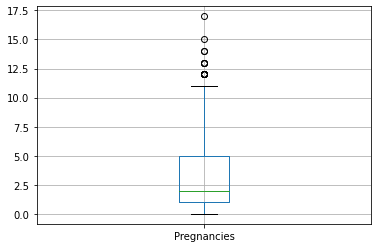

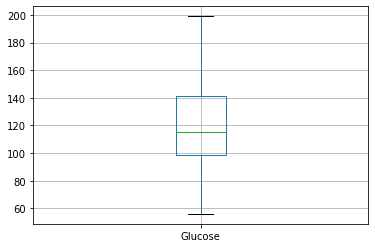

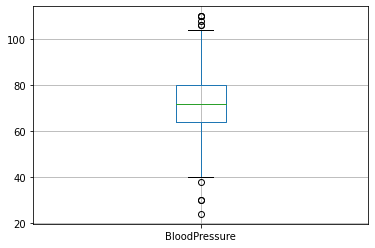

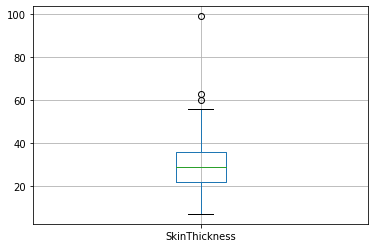

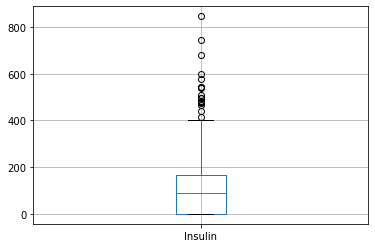

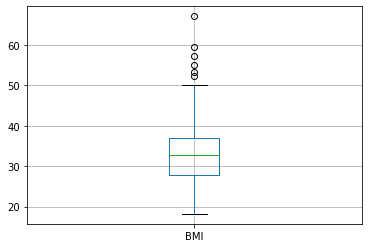

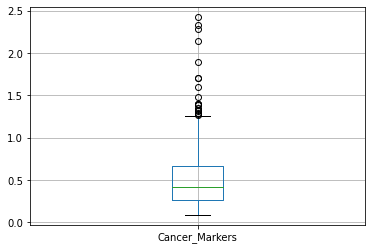

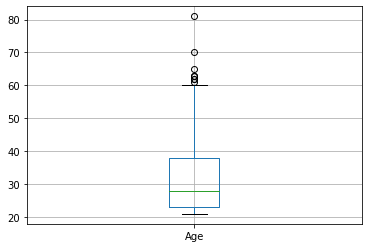

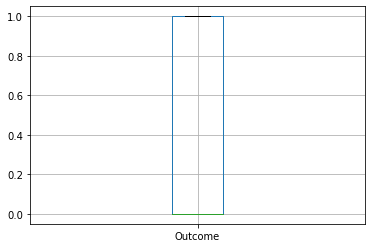

In [17]:
# lets check if there are outliers in the data using box plots
for (columnName, columnData) in dataset.iteritems(): 
    dataset.boxplot(column = [columnName])
    plt.show()

<AxesSubplot:>

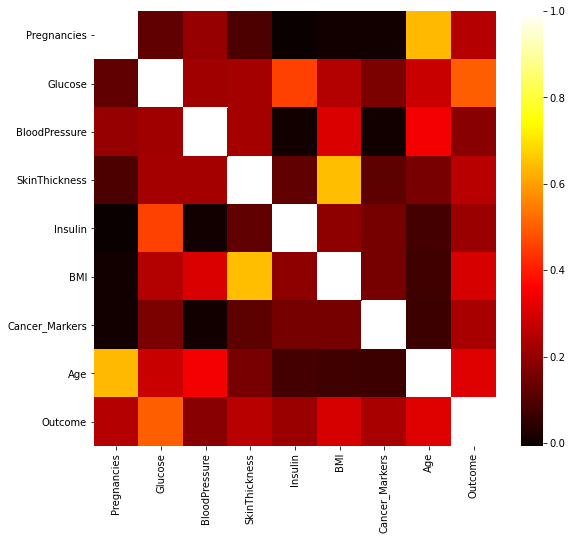

In [18]:
# lets see heat map for correlation between features and outputs
corrmat = dataset.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="hot") 

# From the above correlation matrix we see that all features are pretty much
# independent and hence no need to eliminate features...
#
# So, Let's split the data into test and training data, scale & proceed with kNN
# Will use 60% of the data for training and 40% for testing
# We will also stratefy the samples for consistency

In [19]:
cols = dataset.shape[1]

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, cols-1].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

# Let's scale the data

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Let's use the kNN with various values for k (ranging from 1 to 100)
# and see which gives the most accurate result

In [23]:
optimalaccuracyscore=0
for k in range (1, 100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    confmatrix = confusion_matrix(y_test, y_pred)
    classreport = classification_report(y_test, y_pred)
    accuracyscore = accuracy_score(y_test,y_pred)
    if optimalaccuracyscore == 0:
        optimalconfmatrix=confmatrix
        optimalclassreport=classreport
        optimalaccuracyscore=accuracyscore
        optimalk=k
    else :
        if accuracyscore > optimalaccuracyscore :
            optimalconfmatrix=confmatrix
            optimalclassreport=classreport
            optimalaccuracyscore=accuracyscore
            optimalk=k

# Will use the optimal value of k obtained from above
# to analyse the results, accuracy obtained etc

In [24]:
classifier = KNeighborsClassifier(n_neighbors = optimalk)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confmatrix = confusion_matrix(y_test, y_pred)
classreport = classification_report(y_test, y_pred)
accuracyscore = accuracy_score(y_test,y_pred)
print("Optimal k", optimalk)
print("Confusion Matrix:", confmatrix)
print("Classification Report:")
print(classreport)
print("Accuracy:", accuracyscore)

Optimal k 45
Confusion Matrix: [[137   5]
 [ 40  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       142
           1       0.86      0.44      0.58        71

    accuracy                           0.79       213
   macro avg       0.82      0.70      0.72       213
weighted avg       0.80      0.79      0.77       213

Accuracy: 0.7887323943661971


In [25]:
classifier = KNeighborsClassifier(n_neighbors = optimalk, weights = 'distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confmatrix = confusion_matrix(y_test, y_pred)
classreport = classification_report(y_test, y_pred)
accuracyscore = accuracy_score(y_test,y_pred)
print("Optimal k", optimalk)
print("Confusion Matrix:", confmatrix)
print("Classification Report:")
print(classreport)
print("Accuracy:", accuracyscore)

Optimal k 45
Confusion Matrix: [[136   6]
 [ 39  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       142
           1       0.84      0.45      0.59        71

    accuracy                           0.79       213
   macro avg       0.81      0.70      0.72       213
weighted avg       0.80      0.79      0.77       213

Accuracy: 0.7887323943661971


# Now lets plot the ROC curve

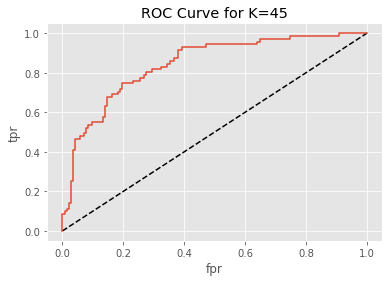

In [26]:
plt.style.use('ggplot')
y_pred_proba = classifier.predict_proba(X_test)[:,1]
y_predict = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve (y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='kNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve for K=' + str(optimalk) )
plt.show()

# Now lets use more ideas to see whether they increase accuracy
# by varying  training/test set, GridSearchCV etc

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

In [28]:
#Setup arrays to store training and test accuracies
maxneighbours = 25
neighbors = np.arange(1,maxneighbours)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

optimalk=0
optimalaccuracy=0

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #print("Training accuracy for",i,"is", train_accuracy[i])
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    print("Accuracy for",i+1,"is", test_accuracy[i])
    
    if (test_accuracy[i] > optimalaccuracy):
        optimalaccuracy = test_accuracy[i]
        optimalk = k;

Accuracy for 1 is 0.6995305164319249
Accuracy for 2 is 0.7323943661971831
Accuracy for 3 is 0.7276995305164319
Accuracy for 4 is 0.7323943661971831
Accuracy for 5 is 0.7417840375586855
Accuracy for 6 is 0.7511737089201878
Accuracy for 7 is 0.755868544600939
Accuracy for 8 is 0.7370892018779343
Accuracy for 9 is 0.7323943661971831
Accuracy for 10 is 0.755868544600939
Accuracy for 11 is 0.7370892018779343
Accuracy for 12 is 0.7652582159624414
Accuracy for 13 is 0.7464788732394366
Accuracy for 14 is 0.7605633802816901
Accuracy for 15 is 0.7511737089201878
Accuracy for 16 is 0.7652582159624414
Accuracy for 17 is 0.7652582159624414
Accuracy for 18 is 0.7605633802816901
Accuracy for 19 is 0.7511737089201878
Accuracy for 20 is 0.7464788732394366
Accuracy for 21 is 0.7511737089201878
Accuracy for 22 is 0.7511737089201878
Accuracy for 23 is 0.7464788732394366
Accuracy for 24 is 0.7464788732394366


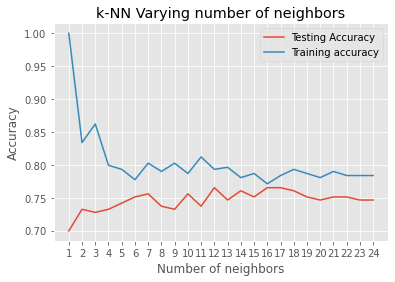

In [29]:
#Generate plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(range(1, maxneighbours))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [30]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=optimalk)
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [31]:
knn.score(X_test,y_test)

0.7652582159624414

In [32]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[133,   9],
       [ 41,  30]], dtype=int64)

In [33]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,133,9,142
1,41,30,71
All,174,39,213


In [34]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict= knn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

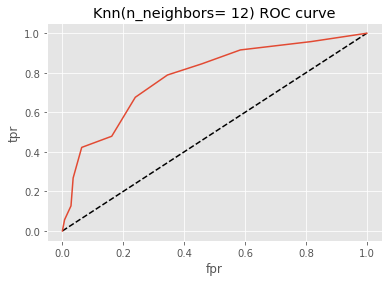

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors= {}) ROC curve'.format(optimalk))
plt.show()

In [36]:
roc_auc_score(y_test,y_pred_proba)

0.7803015274747075

In [37]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [38]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10) # popular to use 10 for GridSearchCV
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [39]:
knn_cv.best_score_

0.7706149545772187

In [40]:
knn_cv.best_params_

{'n_neighbors': 18}

In [41]:
# now lets play around with different weigths, algorithms, metrics etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

#Setup arrays to store training and test accuracies
maxneighbours = 25
neighbors = np.arange(1,maxneighbours)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

optimalk=0
optimalaccuracy=0

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
#    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski')
#    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
#    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski')
    knn = KNeighborsClassifier(n_neighbors=k)
   
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
    if (test_accuracy[i] > optimalaccuracy):
        optimalaccuracy = test_accuracy[i]
        optimalk = k;

    print("Accuracy for",i+1,"is", test_accuracy[i])

Accuracy for 1 is 0.6995305164319249
Accuracy for 2 is 0.7323943661971831
Accuracy for 3 is 0.7276995305164319
Accuracy for 4 is 0.7323943661971831
Accuracy for 5 is 0.7417840375586855
Accuracy for 6 is 0.7511737089201878
Accuracy for 7 is 0.755868544600939
Accuracy for 8 is 0.7370892018779343
Accuracy for 9 is 0.7323943661971831
Accuracy for 10 is 0.755868544600939
Accuracy for 11 is 0.7370892018779343
Accuracy for 12 is 0.7652582159624414
Accuracy for 13 is 0.7464788732394366
Accuracy for 14 is 0.7605633802816901
Accuracy for 15 is 0.7511737089201878
Accuracy for 16 is 0.7652582159624414
Accuracy for 17 is 0.7652582159624414
Accuracy for 18 is 0.7605633802816901
Accuracy for 19 is 0.7511737089201878
Accuracy for 20 is 0.7464788732394366
Accuracy for 21 is 0.7511737089201878
Accuracy for 22 is 0.7511737089201878
Accuracy for 23 is 0.7464788732394366
Accuracy for 24 is 0.7464788732394366


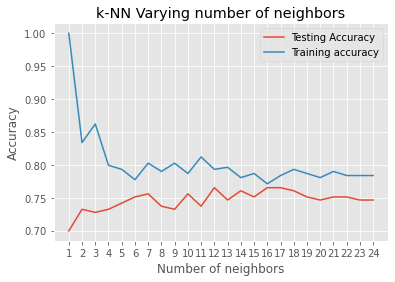

In [42]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(range(1, maxneighbours))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [43]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict= knn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [44]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=optimalk)
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

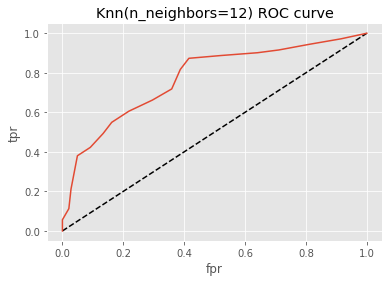

In [45]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors={}) ROC curve'.format(optimalk))
plt.show()